# Research Question 1
1. Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
2. Highlight the two teams that got the longest winning streak and the two teams that got the longest losing streak.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import sys
import matplotlib

## Part 1
In order to solve the question we need information concerning only matches and teams.

In [3]:
matches = pd.read_json("..\data\hw2\matches_England.json")
teams = pd.read_json("teams.json")

It is important to sort the rows of the DataFrame matches to do the cumulative sum of the points per team based on the weeks in ascending order.

In [4]:
matches.sort_values('gameweek', inplace=True)
matches.drop(columns=['competitionId','date','duration','wyId','dateutc',
                      'label','referees','roundId','seasonId','status','venue'],
            inplace=True)
matches.head()

,gameweek,teamsData,winner
379,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1609
370,1,"{'1633': {'scoreET': 0, 'coachId': 269869, 'si...",1611
371,1,"{'1613': {'scoreET': 0, 'coachId': 210700, 'si...",1624
372,1,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",1625
373,1,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",1646


### Selecting the teams which play in Premier League
Notice that the teams' areas are both in England and Wales, with corresponding alpha3codes ENG and XWA.

Moreover, we're interesting only in clubs and not in national teams.

In [5]:
notEng = []
for i in range(len(teams)):
    if (teams.loc[i,'area']['alpha3code'] != 'XEN' and teams.loc[i,'area']['alpha3code'] != 'XWA') or teams.loc[i,'type'] != 'club':
        notEng += [i]
teams.drop(notEng,inplace=True)
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
19,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651


In [6]:
Teams = teams['officialName']

### Setting the DataFrame that has to be plotted ('result', then renamed 'res')
It should have teams' names as indexes, the game weeks as column labels and the points cumulated by each team at every game week as entries.

In [7]:
num_weeks = matches['gameweek'].max()
gameweeks = list(range(1, num_weeks+1))
result = pd.DataFrame(index=Teams,columns=gameweeks)
result.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
officialName,,,,,,,,,,,,,,,,,,,,,
Newcastle United FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huddersfield Town FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Swansea City AFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brighton & Hove Albion FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating a Dictionary from the dataset _teams.json_
This is useful to extract the team names using the *wyId*s as keys.

In [8]:
teams.index=teams['wyId']
teams.drop(columns = ['area','city','name','type','wyId'],
          inplace=True)

In [9]:
teams = teams.T
teams

wyId,1613,1673,10531,1659,1651,1646,1631,1633,1639,1644,1623,1627,1625,1624,1628,1619,1612,1610,1611,1609
officialName,Newcastle United FC,Huddersfield Town FC,Swansea City AFC,AFC Bournemouth,Brighton & Hove Albion FC,Burnley FC,Leicester City FC,West Ham United FC,Stoke City FC,Watford FC,Everton FC,West Bromwich Albion FC,Manchester City FC,Tottenham Hotspur FC,Crystal Palace FC,Southampton FC,Liverpool FC,Chelsea FC,Manchester United FC,Arsenal FC


In [10]:
team = pd.Series.to_dict(teams.iloc[0])

### Assignment of points per match
We do that by using the information about the winner from the DataFrame 'matches' and the information about the teams involved in each match (stored in the dictionary 'teamData' from DataFrame).

In [11]:
length = len(matches)
for i in range(length):
    g_week = matches.loc[i,'gameweek']
    id1,id2 = list(map(int,matches.loc[i,'teamsData'].keys()))
    if not matches.loc[i,'winner']:
        result.loc[team[id1], g_week] = result.loc[team[id2], g_week] = 1
    elif matches.loc[i,'winner'] == id1:
        result.loc[team[id1], g_week] = 3
        result.loc[team[id2], g_week] = 0
    else:
        result.loc[team[id1], g_week] = 0
        result.loc[team[id2], g_week] = 3

In [12]:
result # at this point, we have the points gained per match per team, sorted by time

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
officialName,,,,,,,,,,,,,,,,,,,,,
Newcastle United FC,0,0,3,3,3,0,1,1,3,0,...,0,3,0,3,3,3,0,0,0,3
Huddersfield Town FC,3,3,1,0,1,1,0,0,3,0,...,0,1,0,0,1,3,1,0,1,0
Swansea City AFC,1,0,3,0,1,0,0,3,0,0,...,3,1,0,0,1,1,0,0,0,0
AFC Bournemouth,0,0,0,0,3,0,1,0,3,0,...,1,0,3,1,1,0,0,0,3,3
Brighton & Hove Albion FC,0,0,1,3,0,3,0,1,3,1,...,3,1,0,0,1,0,1,1,3,0
Burnley FC,3,0,1,3,1,1,3,1,0,3,...,3,3,0,3,3,3,1,1,0,0
Leicester City FC,0,3,0,0,1,0,1,1,3,3,...,1,3,3,3,0,0,1,0,0,0
West Ham United FC,0,0,0,3,1,0,3,1,0,1,...,0,0,1,3,1,1,0,0,3,3
Stoke City FC,0,3,1,1,0,0,3,0,0,3,...,1,0,0,0,0,1,1,1,0,3


### Calculating the cumulative points related to the game weeks

In [13]:
res = result.T.cumsum()

In order to get the legend (of the plot) sorted from the winner of the Championship to the last classified, we sort the columns of the DataFrame to plot (res.T at this point) with the last row (the one with the final points) in descending order.

In [14]:
res = res.T.sort_values(num_weeks, ascending=False).T

In [15]:
res.index = list(map(lambda a: 'week '+str(a), res.index))
res

officialName,Manchester City FC,Manchester United FC,Tottenham Hotspur FC,Liverpool FC,Chelsea FC,Arsenal FC,Burnley FC,Everton FC,Leicester City FC,Crystal Palace FC,AFC Bournemouth,Newcastle United FC,West Ham United FC,Brighton & Hove Albion FC,Watford FC,Huddersfield Town FC,Southampton FC,Stoke City FC,Swansea City AFC,West Bromwich Albion FC
week 1,3,3,3,1,0,3,3,3,0,0,0,0,0,0,1,3,1,0,1,3
week 2,4,6,3,4,3,3,3,4,3,0,0,0,0,0,4,6,4,3,1,6
week 3,7,9,4,7,6,3,4,4,3,0,0,3,0,1,5,7,5,4,4,7
week 4,10,10,7,7,9,6,7,4,3,0,0,6,3,4,8,7,5,5,4,7
week 5,13,13,8,8,10,7,8,4,4,0,3,9,4,4,8,8,8,5,5,8
week 6,16,16,11,11,13,10,9,7,4,0,3,9,4,7,11,9,8,5,5,8
week 7,19,19,14,12,13,13,12,7,5,0,4,10,7,7,12,9,8,8,5,9
week 8,22,20,17,13,13,13,13,8,6,3,4,11,8,8,15,9,9,8,8,10
week 9,25,20,20,13,16,16,13,8,9,3,7,14,8,11,15,12,12,8,8,10
week 10,28,23,20,16,19,19,16,8,12,4,7,14,9,12,15,12,13,11,8,10


<Figure size 432x288 with 0 Axes>

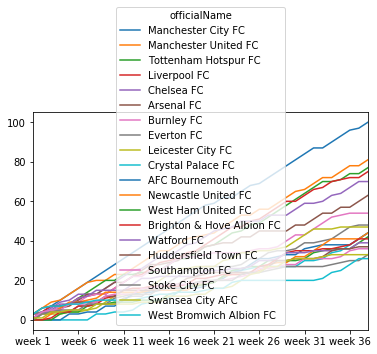

In [16]:
plt.figure()
res.plot()

## Part 2

The idea is to apply a function that can calculate both the longest winning streak and the longest losing streak to each team's results.

In order to do this, it is useful to reconsider the DataFrame 'result'.

By applying to (transposed) 'result' a function which returns the longest streak of some value 'VAL' (3 or 0 points) in a vector 'v' (the vector of points sorted by game week), we get the table with the streaks for each team to compare.

In [18]:
result = result.T

In [26]:
def streak(v, VAL):
    max = st = 0
    flag = 0
    # flag=1 means that we've already started to count the elements of a streak 'st'
    # flag=0 means that we're still searching for the first element of a streak 'st'
    
    for x in v:

        if x == VAL:
            
            if flag:
                st += 1
                
            else:
                flag = 1
                st += 1
            
        else:
            flag = 0
            if st > max:
                max = st
            st = 0
            
    return max

In [54]:
wStreak = result.apply(lambda v: streak(v,3))
wStreak.sort_values(ascending=False, inplace=True)
wStreak

officialName
Manchester City FC           18
Tottenham Hotspur FC          7
Manchester United FC          4
Chelsea FC                    4
Liverpool FC                  4
Leicester City FC             4
Arsenal FC                    3
Burnley FC                    3
Newcastle United FC           3
Everton FC                    2
West Bromwich Albion FC       2
West Ham United FC            2
Crystal Palace FC             2
Brighton & Hove Albion FC     2
AFC Bournemouth               2
Swansea City AFC              2
Huddersfield Town FC          2
Watford FC                    2
Stoke City FC                 1
Southampton FC                1
dtype: int64

In [55]:
lStreak = result.apply(lambda v: streak(v,0))
lStreak.sort_values(ascending=False, inplace=True)
lStreak

officialName
West Bromwich Albion FC      8
Crystal Palace FC            7
Huddersfield Town FC         5
Watford FC                   4
Swansea City AFC             4
AFC Bournemouth              4
Stoke City FC                4
Newcastle United FC          4
Everton FC                   3
West Ham United FC           3
Burnley FC                   3
Brighton & Hove Albion FC    3
Southampton FC               3
Arsenal FC                   3
Leicester City FC            2
Chelsea FC                   2
Manchester City FC           1
Manchester United FC         1
Tottenham Hotspur FC         1
Liverpool FC                 1
dtype: int64

#### List of the two teams with the longest winning streak (sorted)

In [66]:
list(wStreak.index[0:2])

['Manchester City FC', 'Tottenham Hotspur FC']

#### List of the two teams with the longest losing streak (sorted)

In [67]:
list(lStreak.index[0:2])

['West Bromwich Albion FC', 'Crystal Palace FC']